# Pizza Sales – Data Analysis Overview 📊

This project explores the Pizza Sales dataset to uncover patterns and factors affecting Pizza Sales. The dataset includes detailed records that related to pizza sales and other affecting factors.

In this project, we analyze this dataset using Python libraries such as Pandas, NumPy, and Matplotlib/Seaborn.

**Objectives**:

- Explore dataset structure
- Perform cleaning and preprocessing
- Generate insights from data
- Visualize important trends

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
file= pd.read_csv("pizza_sales.csv") 
file.head()

,purchase_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## **2. Explore the dataset**

We have to check dataset dimensions, columns, data types, and summary statistics.
- Using `file.info()` to know the
    - dimensions of the dataset,
    - column names,
    - data types of the columns,
    - count of non null values

In [3]:
file.info() #checking the file info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purchase_id        48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


## **3. Data Cleaning**

For data cleaning purposes, we used different techniques based on our scenario which are
explained in-depth as follows:

1. Checking the Null values
2. Check for duplicates
3. Standardize the Data

### 1. Checking the Null Values

In [4]:
file.isnull().sum()

purchase_id          0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

- No null values found in this dataset.

### 2. Check for duplicates

In [5]:
#checking for duplicates
print(file.duplicated().sum())
print(file.duplicated('purchase_id').sum())

0
0


- No duplicates found in this dataset.

### 3. Standardize the Data

- Here we can see that many of the data columns are not in appropriate data type. So convert into proper type.
- And create columns for month and day of week

In [6]:
# Combine date and time into a single string
file['OrdertDateTime'] = file['order_date'] + " " + file['order_time']

# Convert to datetime format
file['OrdertDateTime'] = pd.to_datetime(file['OrdertDateTime'],format='mixed',dayfirst = True )

#Extracted Month Name and added a new column
file['Month'] = file['OrdertDateTime'].dt.month_name()

file['Day_of_Week'] = file['OrdertDateTime'].dt.day_name()

file['OrderHour'] = file['OrdertDateTime'].dt.hour

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
file['Month'] = pd.Categorical(file['Month'], categories=month_order, ordered=True)

#Arranging the Days of week in order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
               'Saturday']
file['Day_of_Week'] = pd.Categorical(file['Day_of_Week'], categories=day_order, ordered=True)

file

,purchase_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,OrdertDateTime,Month,Day_of_Week,OrderHour
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36,January,Thursday,11
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40,January,Thursday,11
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40,January,Thursday,11
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40,January,Thursday,11
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40,January,Thursday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015-12-31 21:23:10,December,Thursday,21
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015-12-31 21:23:10,December,Thursday,21
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015-12-31 21:23:10,December,Thursday,21
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-12-31 22:09:54,December,Thursday,22


## **3. Exploratory Data Analysis**

1. Summary Statistics
2. Analysis Visualizations
3. Providing Insights

### 1. Statistical Description

In [7]:
file.describe()

,purchase_id,order_id,quantity,unit_price,total_price,OrdertDateTime,OrderHour
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474,2015-06-30 03:28:34.933833984,15.911806
min,1.000000,1.000000,1.000000,9.750000,9.750000,2015-01-01 11:38:36,9.000000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000,2015-03-31 15:34:31,13.000000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000,2015-06-28 19:50:30,16.000000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000,2015-09-28 18:39:55,18.000000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000,2015-12-31 23:02:05,23.000000
std,14035.529381,6180.119770,0.143077,3.621789,4.437398,NaN,3.149836


- The statistics of the sales data shows that the data distribution is made evenly.

### 2. Analysis 

- Time based
    1. Which month has the max sales?
    2. Which hour is the peak sales hour?
    3. Which category sold most in each month?
    4. When was the sales made high, in weekday or weekends?
    5. Which day of week made the high sales?
    6. Which category sold most in each day of week?
    7. Which month and the day of week is the busiest?
    8. What is the average sales on each month?
- Product based
    1. What is the sales percentage of each category?
    2. Which pizza category sold most?
    3. Which category generated high revenue?
    4. What are the top 10 most sold pizzas?
    5. Which are the least sold pizzas?
    6. Which size of the pizza is mostly preffered?
    7. Which pizza is mostly sold in each category?
    8. Compare the sizes of pizzas in each category.

### Time Based Analysis

In [8]:
#1. Which month has the max sales?
sales_month = file.groupby("Month",observed=True)['purchase_id'].size()
sales_month

Month
January      4156
February     3892
March        4186
April        4067
May          4239
June         4025
July         4301
August       4094
September    3819
October      3797
November     4185
December     3859
Name: purchase_id, dtype: int64

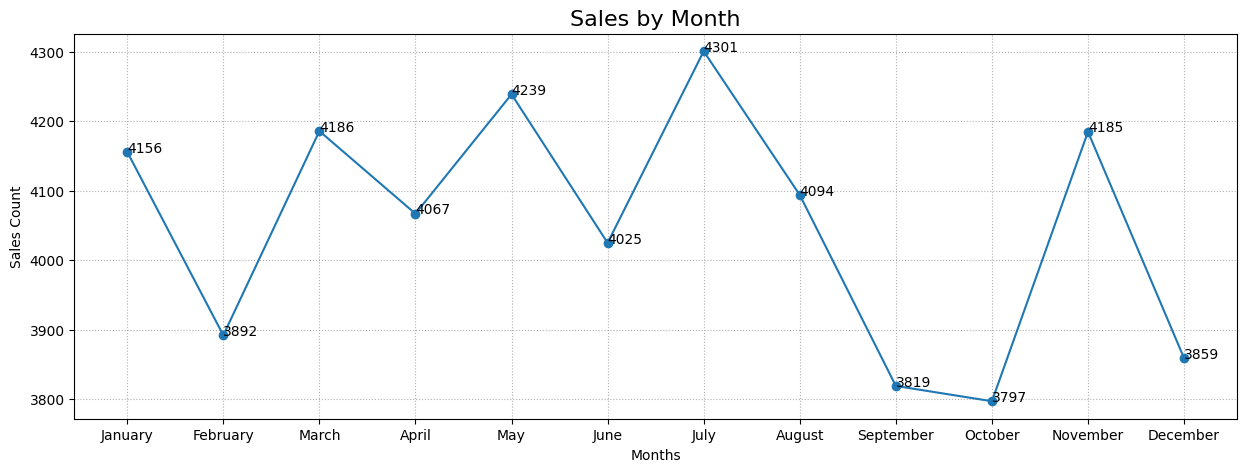

In [9]:
plt.figure(figsize=(15,5))
plt.title("Sales by Month", fontsize=16)
plt.plot(sales_month.index,sales_month.values, marker='o')
plt.xlabel("Months")
plt.ylabel("Sales Count")
plt.grid(linestyle=":")
for x,y in zip(sales_month.index,sales_month.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.show()


- The max sales was made in July Month(4301)
- October is the least sales made month(3797) but not a huge difference

In [10]:
#2. Which hour is the peak sales hour?
hour_sales = file.groupby("OrderHour")['purchase_id'].size()
hour_sales

OrderHour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: purchase_id, dtype: int64

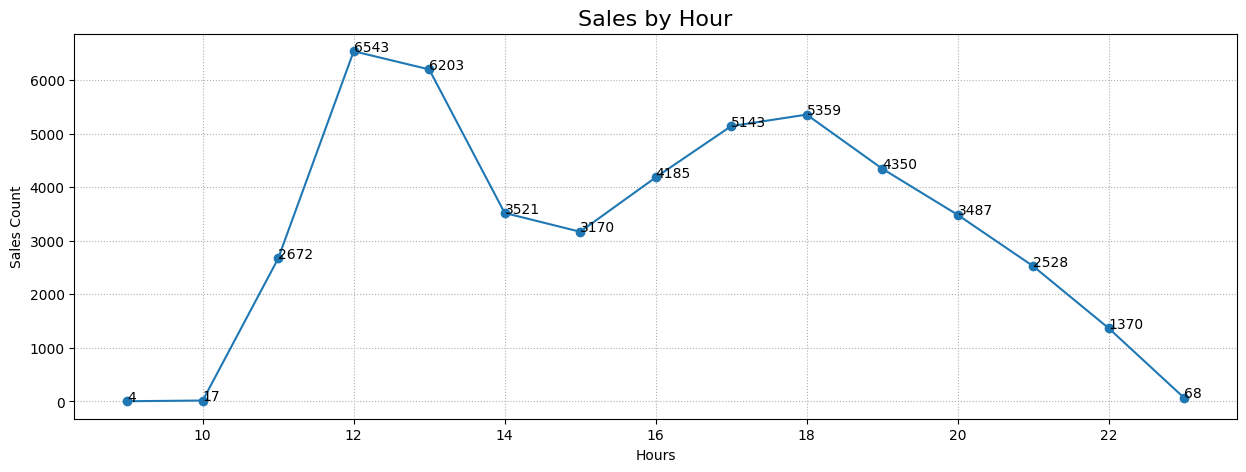

In [11]:
plt.figure(figsize=(15,5))
plt.title("Sales by Hour", fontsize=16)
plt.plot(hour_sales.index,hour_sales.values, marker='o')
plt.xlabel("Hours")
plt.ylabel("Sales Count")
plt.grid(linestyle=":")
for x,y in zip(hour_sales.index,hour_sales.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.show()


- The sales was peak between the hours 12 to 1 pm which is basically a lunch time.
- And again the sales was high between the hours 5 to 6 pm which is basically a break time.

In [12]:
#3. Which category sold most in each month?
category_month = file.pivot_table(index='Month',columns='pizza_category',values='purchase_id',aggfunc='size',observed=True)
category_month

pizza_category,Chicken,Classic,Supreme,Veggie
Month,,,,
January,894,1238,1026,998
February,859,1158,948,927
March,981,1211,971,1023
April,903,1230,989,945
May,919,1293,1024,1003
June,887,1177,1021,940
July,942,1305,1021,1033
August,916,1256,974,948
September,881,1174,865,899


In [13]:
top_category_per_month = category_month.idxmax(axis=1) # it will return the max value in each column
top_category_counts = category_month.max(axis=1) #it will return the count of max value in each column
summary = pd.DataFrame({
    'Top Category': top_category_per_month,
    'Purchase Count': top_category_counts
})
print(summary)

          Top Category  Purchase Count
Month                                 
January        Classic            1238
February       Classic            1158
March          Classic            1211
April          Classic            1230
May            Classic            1293
June           Classic            1177
July           Classic            1305
August         Classic            1256
September      Classic            1174
October        Classic            1152
November       Classic            1237
December       Classic            1148


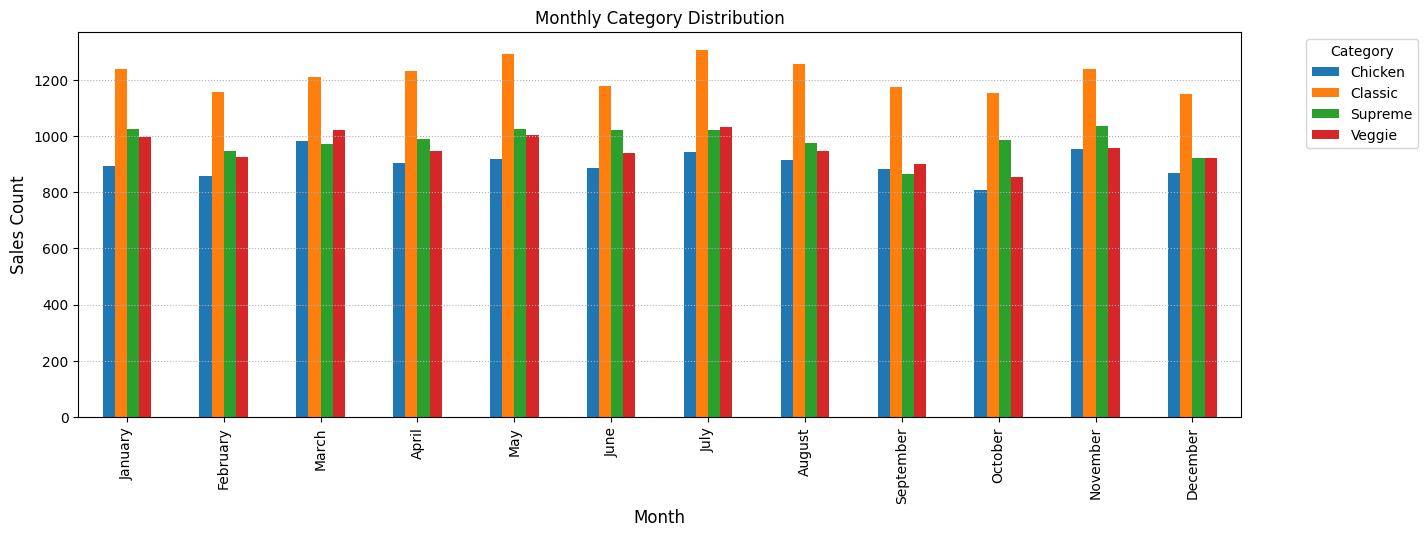

In [14]:
category_month.plot(kind='bar', figsize=(15,5), title='Monthly Category Distribution')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales Count", fontsize=12)
plt.grid(axis='y', linestyle=':')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- The above visual clearly shows that on every month, 'Classic' category pizzas were sold most.
- Among these months, 'July' is the most sales made month.

In [15]:
#4. When was the sales made high, in weekday or weekends?
weekdays_sales = file.groupby('Day_of_Week',observed=True)['purchase_id'].size()
weekdays_sales

Day_of_Week
Sunday       5917
Monday       6369
Tuesday      6753
Wednesday    6797
Thursday     7323
Friday       8106
Saturday     7355
Name: purchase_id, dtype: int64

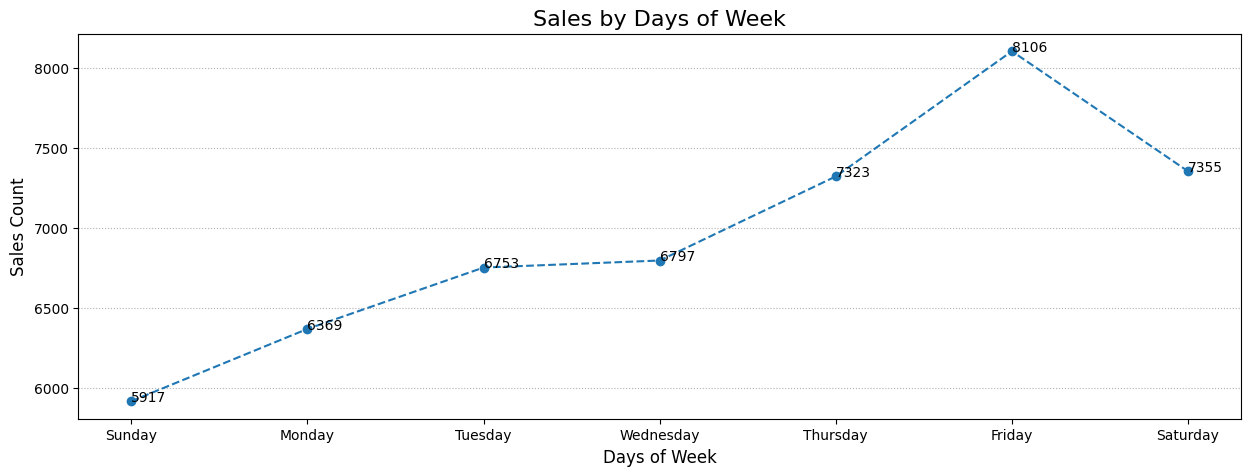

In [16]:
plt.figure(figsize=(15,5))
plt.title("Sales by Days of Week", fontsize=16)
plt.plot(weekdays_sales.index,weekdays_sales.values, marker='o',linestyle='--')
plt.xlabel("Days of Week", fontsize=12)
plt.ylabel("Sales Count", fontsize=12)
for x,y in zip(weekdays_sales.index,weekdays_sales.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.grid(axis='y', linestyle=':')
plt.show()

- The highest sales was made on Fridays(8106) which is a weekday.
- And we have to notice that 'Sundays' made the low sales in weeks.

In [17]:
#5. Which day of week generated the high revenue?
dayofweek_revenue = file.groupby('Day_of_Week',observed=True)['total_price'].sum()
dayofweek_revenue

Day_of_Week
Sunday        99203.50
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Name: total_price, dtype: float64

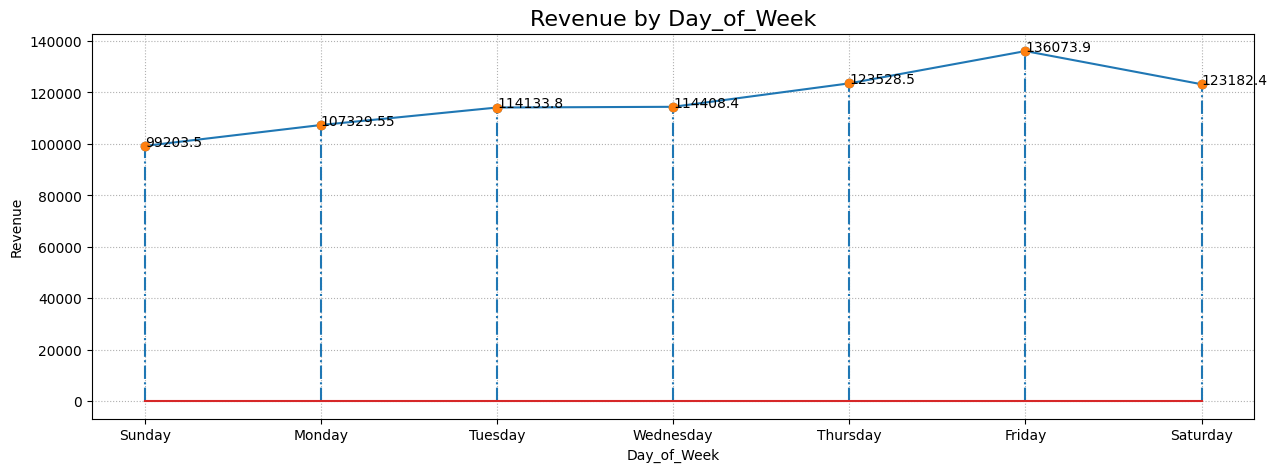

In [18]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Day_of_Week", fontsize=16)
plt.plot(dayofweek_revenue.index,dayofweek_revenue.values, marker='o')
plt.stem(dayofweek_revenue.index,dayofweek_revenue.values,linefmt='-.', markerfmt='o')
plt.xlabel("Day_of_Week")
plt.ylabel("Revenue")
plt.grid(linestyle=":")
for x,y in zip(dayofweek_revenue.index,dayofweek_revenue.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.show()

- The max revenue was generated on Fridays(136073.90) which is a weekday.
- And we have to notice that 'Sundays'(99203.50) made the low sales revenue in weeks.

In [19]:
#6. Which category sold most in each day of week?
category_Day_of_Week = file.pivot_table(index='Day_of_Week',columns='pizza_category',values='purchase_id',aggfunc='size',observed=True)
category_Day_of_Week

pizza_category,Chicken,Classic,Supreme,Veggie
Day_of_Week,,,,
Sunday,1308,1789,1453,1367
Monday,1506,1898,1493,1472
Tuesday,1461,2007,1696,1589
Wednesday,1509,2007,1655,1626
Thursday,1596,2208,1793,1726
Friday,1797,2463,1923,1923
Saturday,1638,2207,1764,1746


In [20]:
max_cat_day = category_Day_of_Week.idxmax(axis = 1)
day_top_category_counts = category_Day_of_Week.max(axis=1) #it will return the count of max value in each column
summary = pd.DataFrame({
    'Top Category': max_cat_day,
    'Purchase Count': day_top_category_counts
})
print(summary)

            Top Category  Purchase Count
Day_of_Week                             
Sunday           Classic            1789
Monday           Classic            1898
Tuesday          Classic            2007
Wednesday        Classic            2007
Thursday         Classic            2208
Friday           Classic            2463
Saturday         Classic            2207


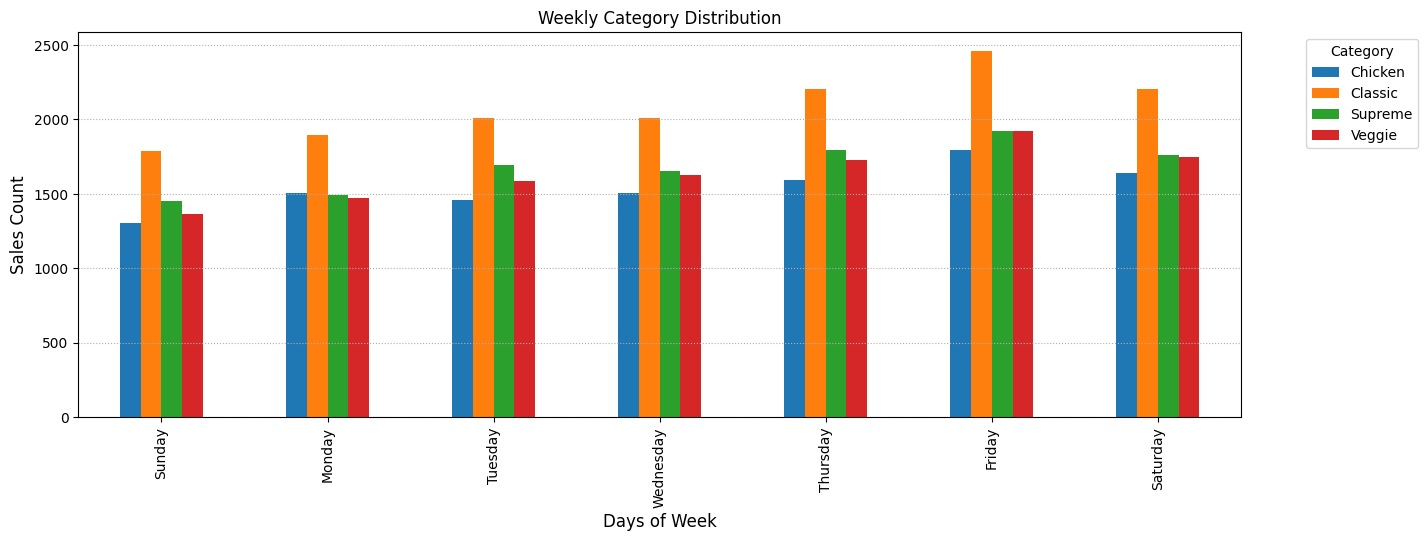

In [21]:
category_Day_of_Week.plot(kind='bar', figsize=(15,5), title='Weekly Category Distribution')
plt.xlabel("Days of Week", fontsize=12)
plt.ylabel("Sales Count", fontsize=12)
plt.grid(axis='y', linestyle=':')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- The above visual clearly shows that on every day of week, 'Classic' category pizzas were sold most.
- Among the days, 'Friday' is the most sales made day for 'Classic' category pizzas.

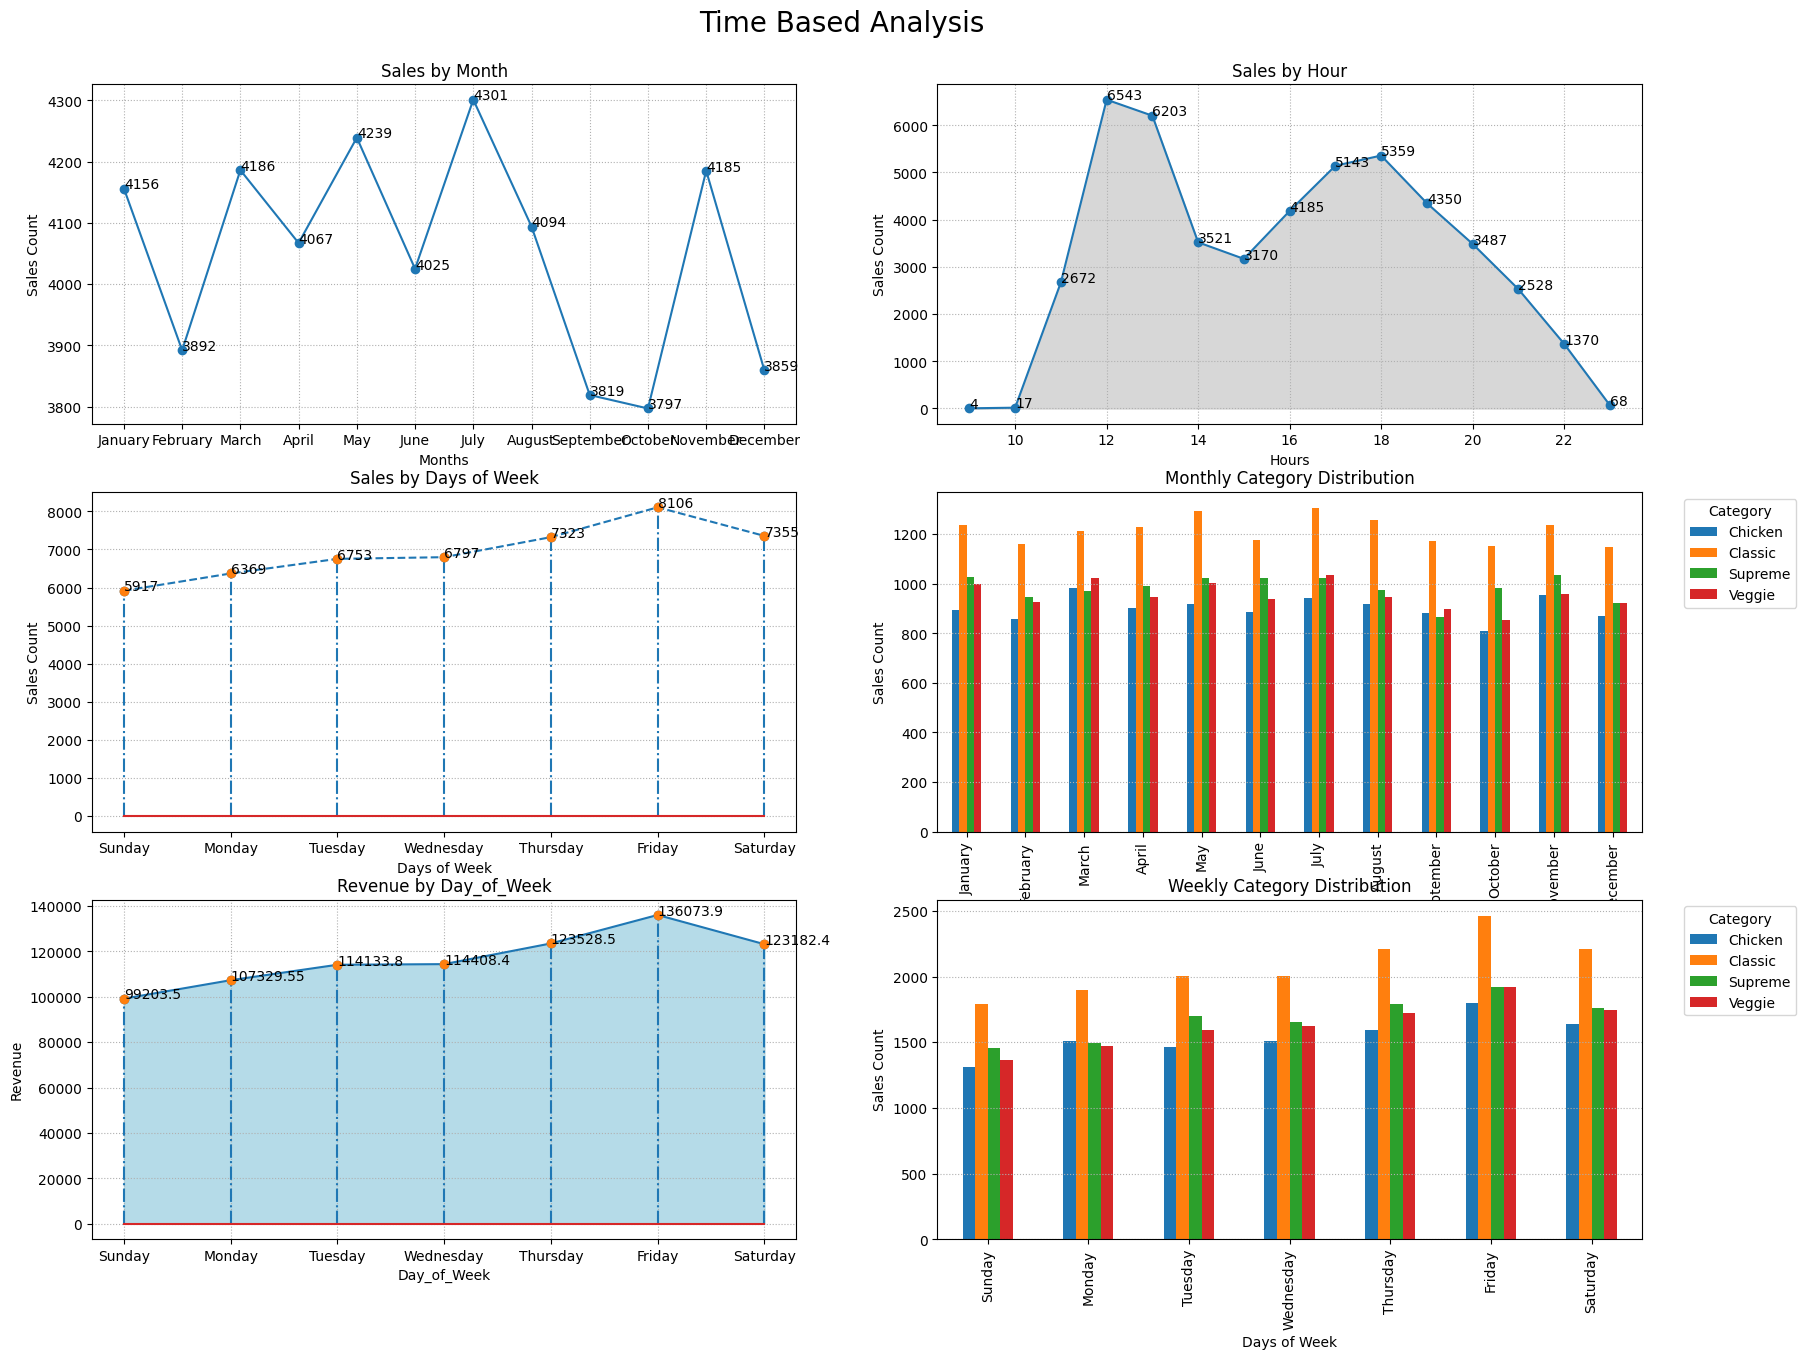

In [120]:
plt.figure(figsize=(20, 15))
plt.suptitle("Time Based Analysis",fontsize='20',y=0.93)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 1. Sales by Month
plt.subplot(3, 2, 1)
plt.title("Sales by Month")
plt.plot(sales_month.index, sales_month.values, marker='o')
plt.xlabel("Months")
plt.ylabel("Sales Count")
plt.grid(linestyle=":")
for x, y in zip(sales_month.index, sales_month.values):
    plt.annotate(y, xy=(x, y), xytext=(x, y))

# 2. Sales by Hour
plt.subplot(3, 2, 2)
plt.title("Sales by Hour")
plt.plot(hour_sales.index, hour_sales.values, marker='o')
plt.fill_between(hour_sales.index, hour_sales.values, color='lightgrey', alpha=0.9)
plt.xlabel("Hours")
plt.ylabel("Sales Count")
plt.grid(linestyle=":")
for x, y in zip(hour_sales.index, hour_sales.values):
    plt.annotate(y, xy=(x, y), xytext=(x, y))

# 3. Monthly Category Distribution with Top Category Annotation
plt.subplot(3, 2, 4)
ax = plt.gca()  # Get current axes
category_month.plot(kind='bar', ax=ax)
ax.set_title('Monthly Category Distribution')
ax.set_xlabel("Month")
ax.set_ylabel("Sales Count")
ax.grid(axis='y', linestyle=':')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc=2)


# 4. Sales by Days of Week
plt.subplot(3, 2, 3)
plt.title("Sales by Days of Week")
plt.plot(weekdays_sales.index, weekdays_sales.values, marker='o', linestyle='--')
plt.stem(weekdays_sales.index, weekdays_sales.values, linefmt='-.', markerfmt='o')
plt.xlabel("Days of Week")
plt.ylabel("Sales Count")
plt.grid(axis='y', linestyle=':')
for x, y in zip(weekdays_sales.index, weekdays_sales.values):
    plt.annotate(y, xy=(x, y), xytext=(x, y))

# 5. Revenue by Day_of_Week
plt.subplot(3, 2, 5)
plt.title("Revenue by Day_of_Week")
plt.plot(dayofweek_revenue.index, dayofweek_revenue.values, marker='o')
plt.stem(dayofweek_revenue.index, dayofweek_revenue.values, linefmt='-.', markerfmt='o')
plt.fill_between(dayofweek_revenue.index, dayofweek_revenue.values, color='lightblue', alpha=0.9)
plt.xlabel("Day_of_Week")
plt.ylabel("Revenue")
plt.grid(linestyle=":")
for x, y in zip(dayofweek_revenue.index, dayofweek_revenue.values):
    plt.annotate(y, xy=(x, y), xytext=(x, y))

# 6. Weekly Category Distribution
plt.subplot(3, 2, 6)
ax2 = plt.gca()
category_Day_of_Week.plot(kind='bar', ax=ax2)
ax2.set_title('Weekly Category Distribution')
ax2.set_xlabel("Days of Week")
ax2.set_ylabel("Sales Count")
ax2.grid(axis='y', linestyle=':')
ax2.legend(title='Category', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


### Product Based Analysis

In [23]:
#1. What is the sales percentage of each category?
pct_cat_sales = file.groupby("pizza_category")['purchase_id'].size()
pct_cat_sales

pizza_category
Chicken    10815
Classic    14579
Supreme    11777
Veggie     11449
Name: purchase_id, dtype: int64

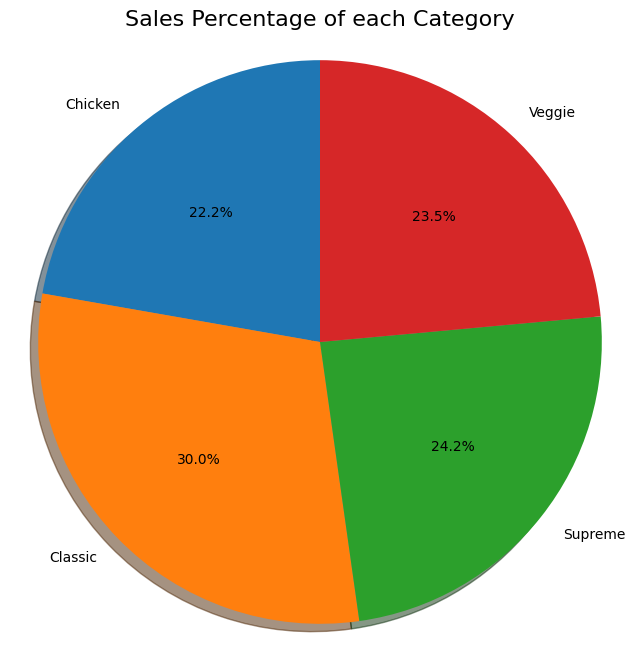

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(pct_cat_sales.values, labels=pct_cat_sales.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sales Percentage of each Category', fontsize=16)
plt.axis('equal') 
plt.show()

- 1st - Classic = 30%(14579)
- 2nd - Supreme = 24.2%(11777)
- 3rd - Veggie = 23.5%(11449)
- 4th - Chicken = 22.2%(10815)


In [25]:
#2. Which pizza category sold most by quantity?
cat_sales = file.groupby("pizza_category")['quantity'].sum()
cat_sales

pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

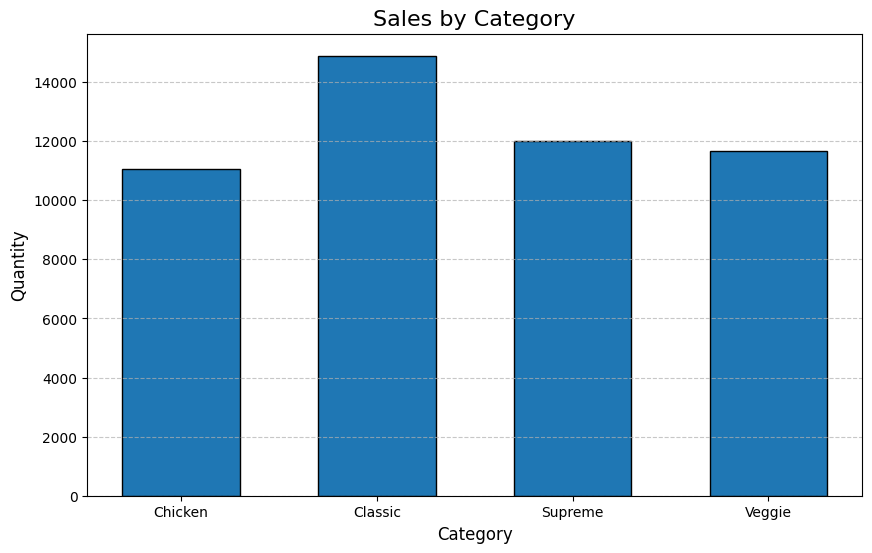

In [93]:
plt.figure(figsize=(10, 6))
plt.bar(cat_sales.index, cat_sales.values, width=0.6, edgecolor='black')
plt.title('Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Classic category pizzas were moslty sold(14888).
- Chicken category pizzas were least sold(11050).

In [27]:
#3. Which category generated high revenue?
cat_revenue = file.groupby("pizza_category")['total_price'].sum()
cat_revenue

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: total_price, dtype: float64

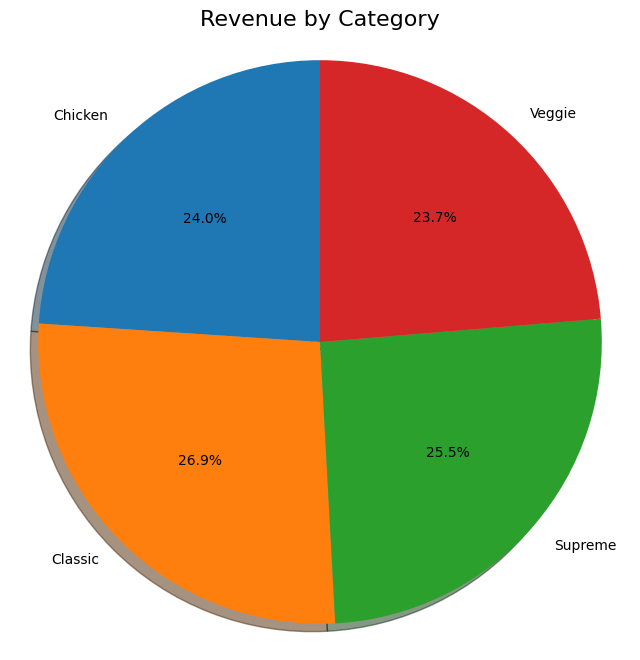

In [94]:
plt.figure(figsize=(8, 8))
plt.pie(cat_revenue.values, labels=cat_revenue.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Revenue % by Category', fontsize=16)
plt.axis('equal') 
plt.show()

In [29]:
#4. What are the top 10 most sold pizzas?
max_pizza_sales = file.groupby("pizza_name")['quantity'].sum().sort_values(ascending=False).head(10)
max_pizza_sales

pizza_name
The Classic Deluxe Pizza        2453
The Barbecue Chicken Pizza      2432
The Hawaiian Pizza              2422
The Pepperoni Pizza             2418
The Thai Chicken Pizza          2371
The California Chicken Pizza    2370
The Sicilian Pizza              1938
The Spicy Italian Pizza         1924
The Southwest Chicken Pizza     1917
The Big Meat Pizza              1914
Name: quantity, dtype: int64

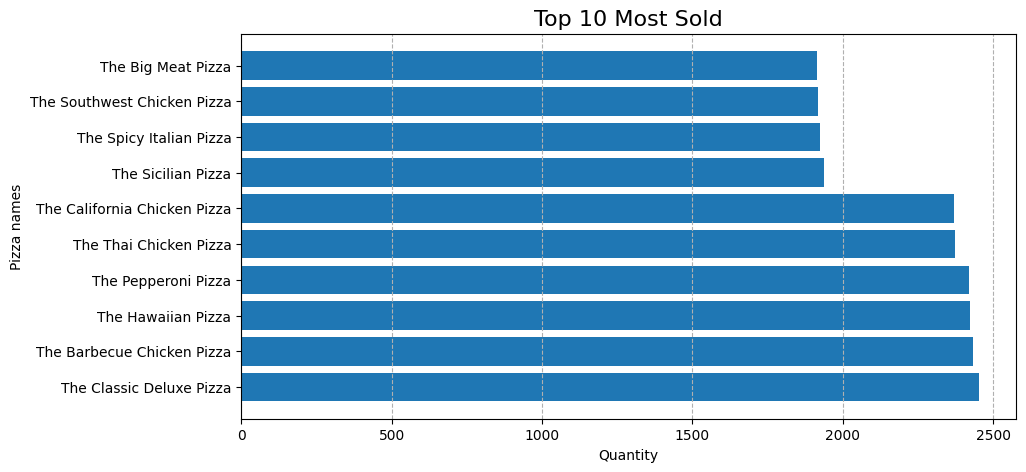

In [30]:
plt.figure(figsize=(10,5))
plt.barh(max_pizza_sales.index, max_pizza_sales.values)
plt.title('Top 10 Most Sold', fontsize=16)
plt.ylabel('Pizza names')
plt.xlabel('Quantity')
plt.grid(axis='x', linestyle='--')
plt.show()

1. The Classic Deluxe Pizza = 2453
2. The Barbecue Chicken Pizza = 2432
3. The Hawaiian Pizza = 2422
4. The Pepperoni Pizza = 2418
5. The Thai Chicken Pizza = 2371
6. The California Chicken Pizza = 2370
7. The Sicilian Pizza = 1938
8. The Spicy Italian Pizza = 1924
9. The Southwest Chicken Pizza = 1917
10. The Big Meat Pizza = 1914

In [31]:
#5. Which are the least sold pizzas?
least_pizza_sales = file.groupby("pizza_name")['quantity'].sum().sort_values(ascending=True).head(10)
least_pizza_sales

pizza_name
The Brie Carre Pizza            490
The Mediterranean Pizza         934
The Calabrese Pizza             937
The Spinach Supreme Pizza       950
The Soppressata Pizza           961
The Spinach Pesto Pizza         970
The Chicken Pesto Pizza         973
The Italian Vegetables Pizza    981
The Chicken Alfredo Pizza       987
The Green Garden Pizza          997
Name: quantity, dtype: int64

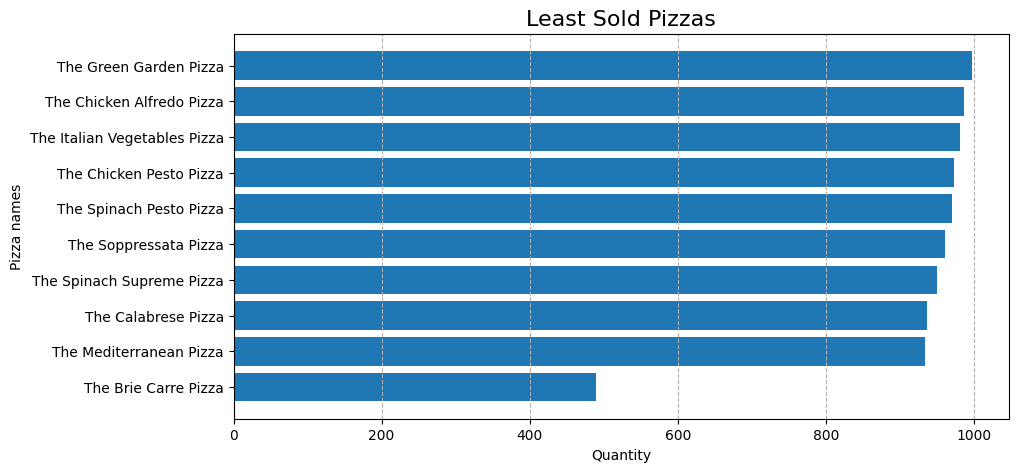

In [32]:
plt.figure(figsize=(10,5))
plt.barh(least_pizza_sales.index, least_pizza_sales.values)
plt.title('Least Sold Pizzas', fontsize=16)
plt.ylabel('Pizza names')
plt.xlabel('Quantity')
plt.grid(axis='x', linestyle='--')
plt.show()

- **Least Sold Pizzas**:
    - The Brie Carre Pizza = 490
    - The Mediterranean Pizza = 934
    - The Calabrese Pizza = 937
    - The Spinach Supreme Pizza = 950
    - The Soppressata Pizza = 961
    - The Spinach Pesto Pizza = 970
    - The Chicken Pesto Pizza = 973
    - The Italian Vegetables Pizza = 981
    - The Chicken Alfredo Pizza = 987
    - The Green Garden Pizza = 997

In [33]:
#6. Which size of the pizza is mostly preffered?
size_pizza_sales = file.groupby("pizza_size")['quantity'].sum()
size_pizza_sales

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

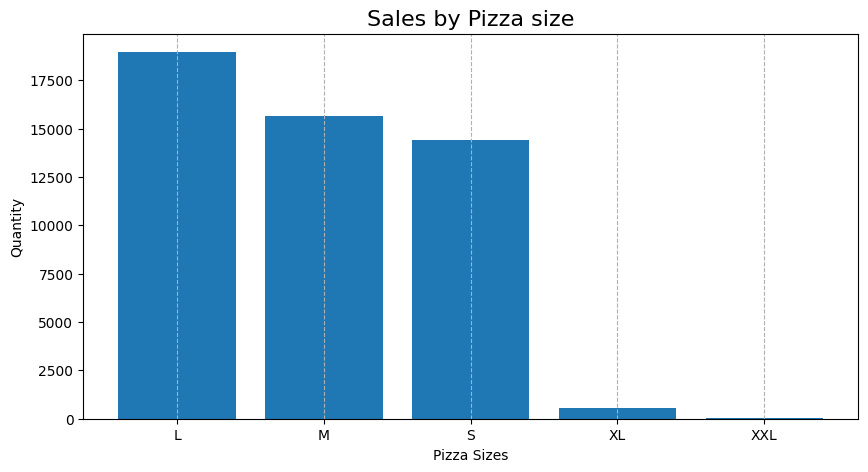

In [91]:
plt.figure(figsize=(10,5))
plt.bar(size_pizza_sales.index, size_pizza_sales.values)
plt.title('Sales by Pizza size', fontsize=16)
plt.xlabel('Pizza Sizes')
plt.ylabel('Quantity')
plt.grid(axis='x', linestyle='--')
plt.show()

- 'L' size pizzas were the most preffered pizza size(18956).
- 'XXL'(28) and 'XL'(552) size pizzas were the least preffered pizza size.

In [65]:
#7. Which pizza is mostly sold in each category?
# Step 1: Group and count purchases
pizza_cat = file.groupby(['pizza_category', 'pizza_name'])['purchase_id'].size().reset_index(name='sales_count')

# Step 2: Sort by category and sales count
pizza_cat_sorted = pizza_cat.sort_values(['pizza_category', 'sales_count'], ascending=[True, False])

# Step 3: Get the top pizza per category
most_sold = pizza_cat_sorted.groupby('pizza_category').first().reset_index()

most_sold

,pizza_category,pizza_name,sales_count
0,Chicken,The Barbecue Chicken Pizza,2372
1,Classic,The Classic Deluxe Pizza,2416
2,Supreme,The Sicilian Pizza,1887
3,Veggie,The Four Cheese Pizza,1850


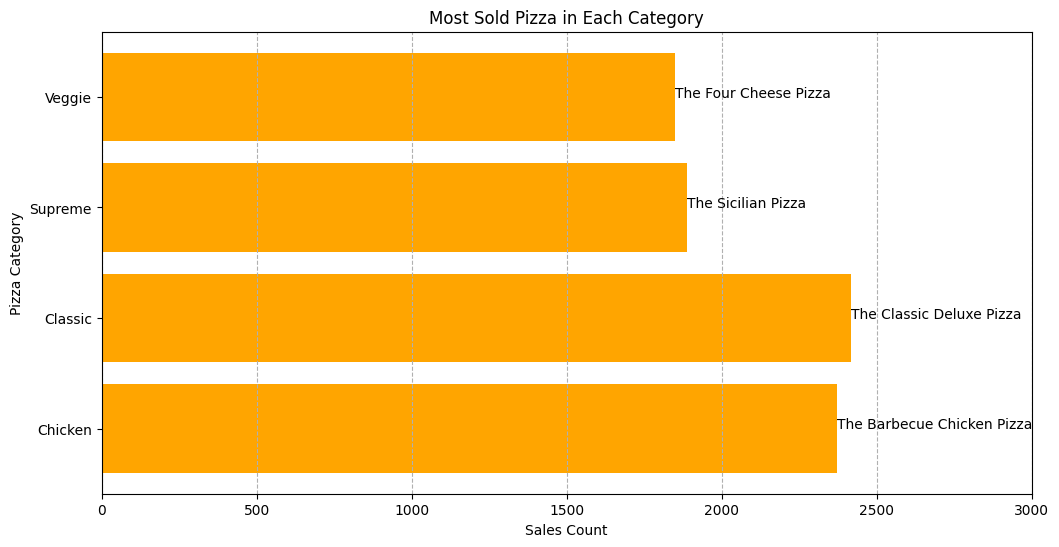

In [63]:
plt.figure(figsize=(12, 6))
plt.barh(most_sold['pizza_category'], most_sold['sales_count'], color='orange')
plt.ylabel('Pizza Category')
plt.xlabel('Sales Count')
plt.xlim(0,3000)
plt.title('Most Sold Pizza in Each Category')
for x,y,z in zip(most_sold['pizza_category'],most_sold['sales_count'],most_sold['pizza_name']):
    plt.annotate(z,xy=(y,x),xytext=(y,x))
plt.grid(axis='x', linestyle='--')
plt.show()


- Most Sold Pizza in Each Category
    1. Chicken - The Barbecue Chicken Pizza - 2372
    2. Classic - The Classic Deluxe Pizza - 2416
    3. Supreme - The Sicilian Pizza - 1887
    4. Veggie - The Four Cheese Pizza - 1850


In [81]:
#8. Compare the sizes of pizzas in each category with revenue.
size_cat_price = file.pivot_table(index='pizza_category',columns='pizza_size',values='total_price',aggfunc='sum',observed=True)
size_cat_price

# Convert to DataFrame
size_cat_price_df = size_cat_price.reset_index()
pivot_df = size_cat_price_df.pivot(index='pizza_category', columns='pizza_size', values='total_price')

# Subplot 8 fix
plt.subplot(4,2,8)
pivot_df.plot(kind='bar', ax=plt.gca(), title='Monthly Category Distribution')
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Sales", fontsize=12)
plt.grid(axis='y', linestyle=':')
plt.legend(title='Pizza Size', bbox_to_anchor=(1.05, 1), loc=2)


pizza_size,L,M,S,XL,XXL
pizza_category,,,,,
Chicken,102339.0,65224.50,28356.00,NaN,NaN
Classic,74518.5,60581.75,69870.25,14076.0,1006.6
Supreme,94258.5,66475.00,47463.50,NaN,NaN
Veggie,104202.7,57101.00,32386.75,NaN,NaN


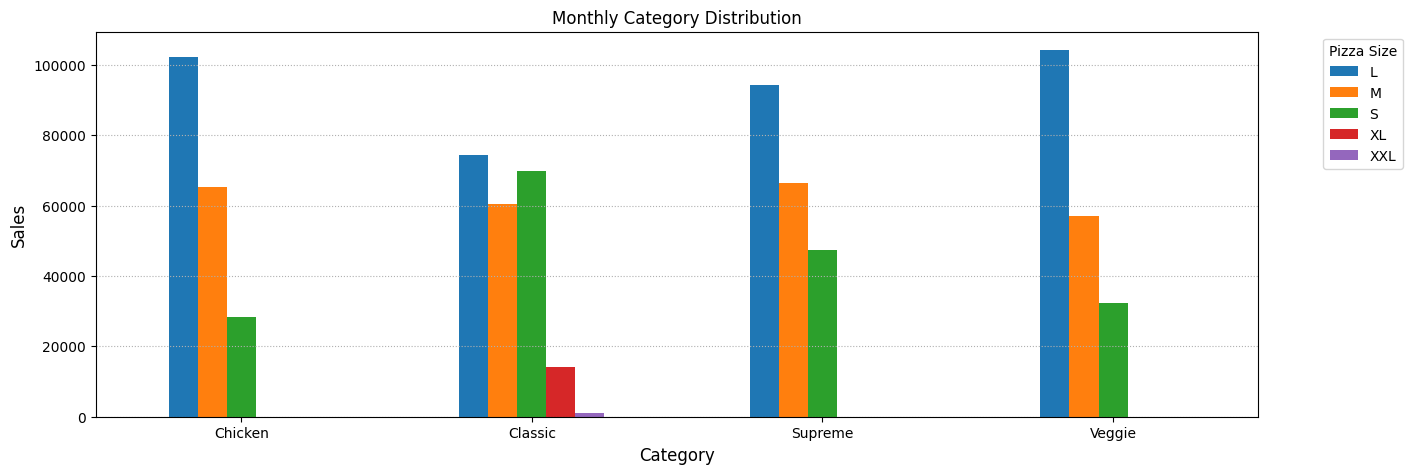

In [86]:
size_cat_price.plot(kind='bar', figsize=(15,5), title='Monthly Category Distribution')
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Sales", fontsize=12)
plt.grid(axis='y', linestyle=':')
plt.legend(title='Pizza Size', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- In every category, 'L' sized pizzas were sold most.
- 'XL' sized pizzas were not sold in any kind.
- 'XXL' sized pizzas were sold only in Classic category.

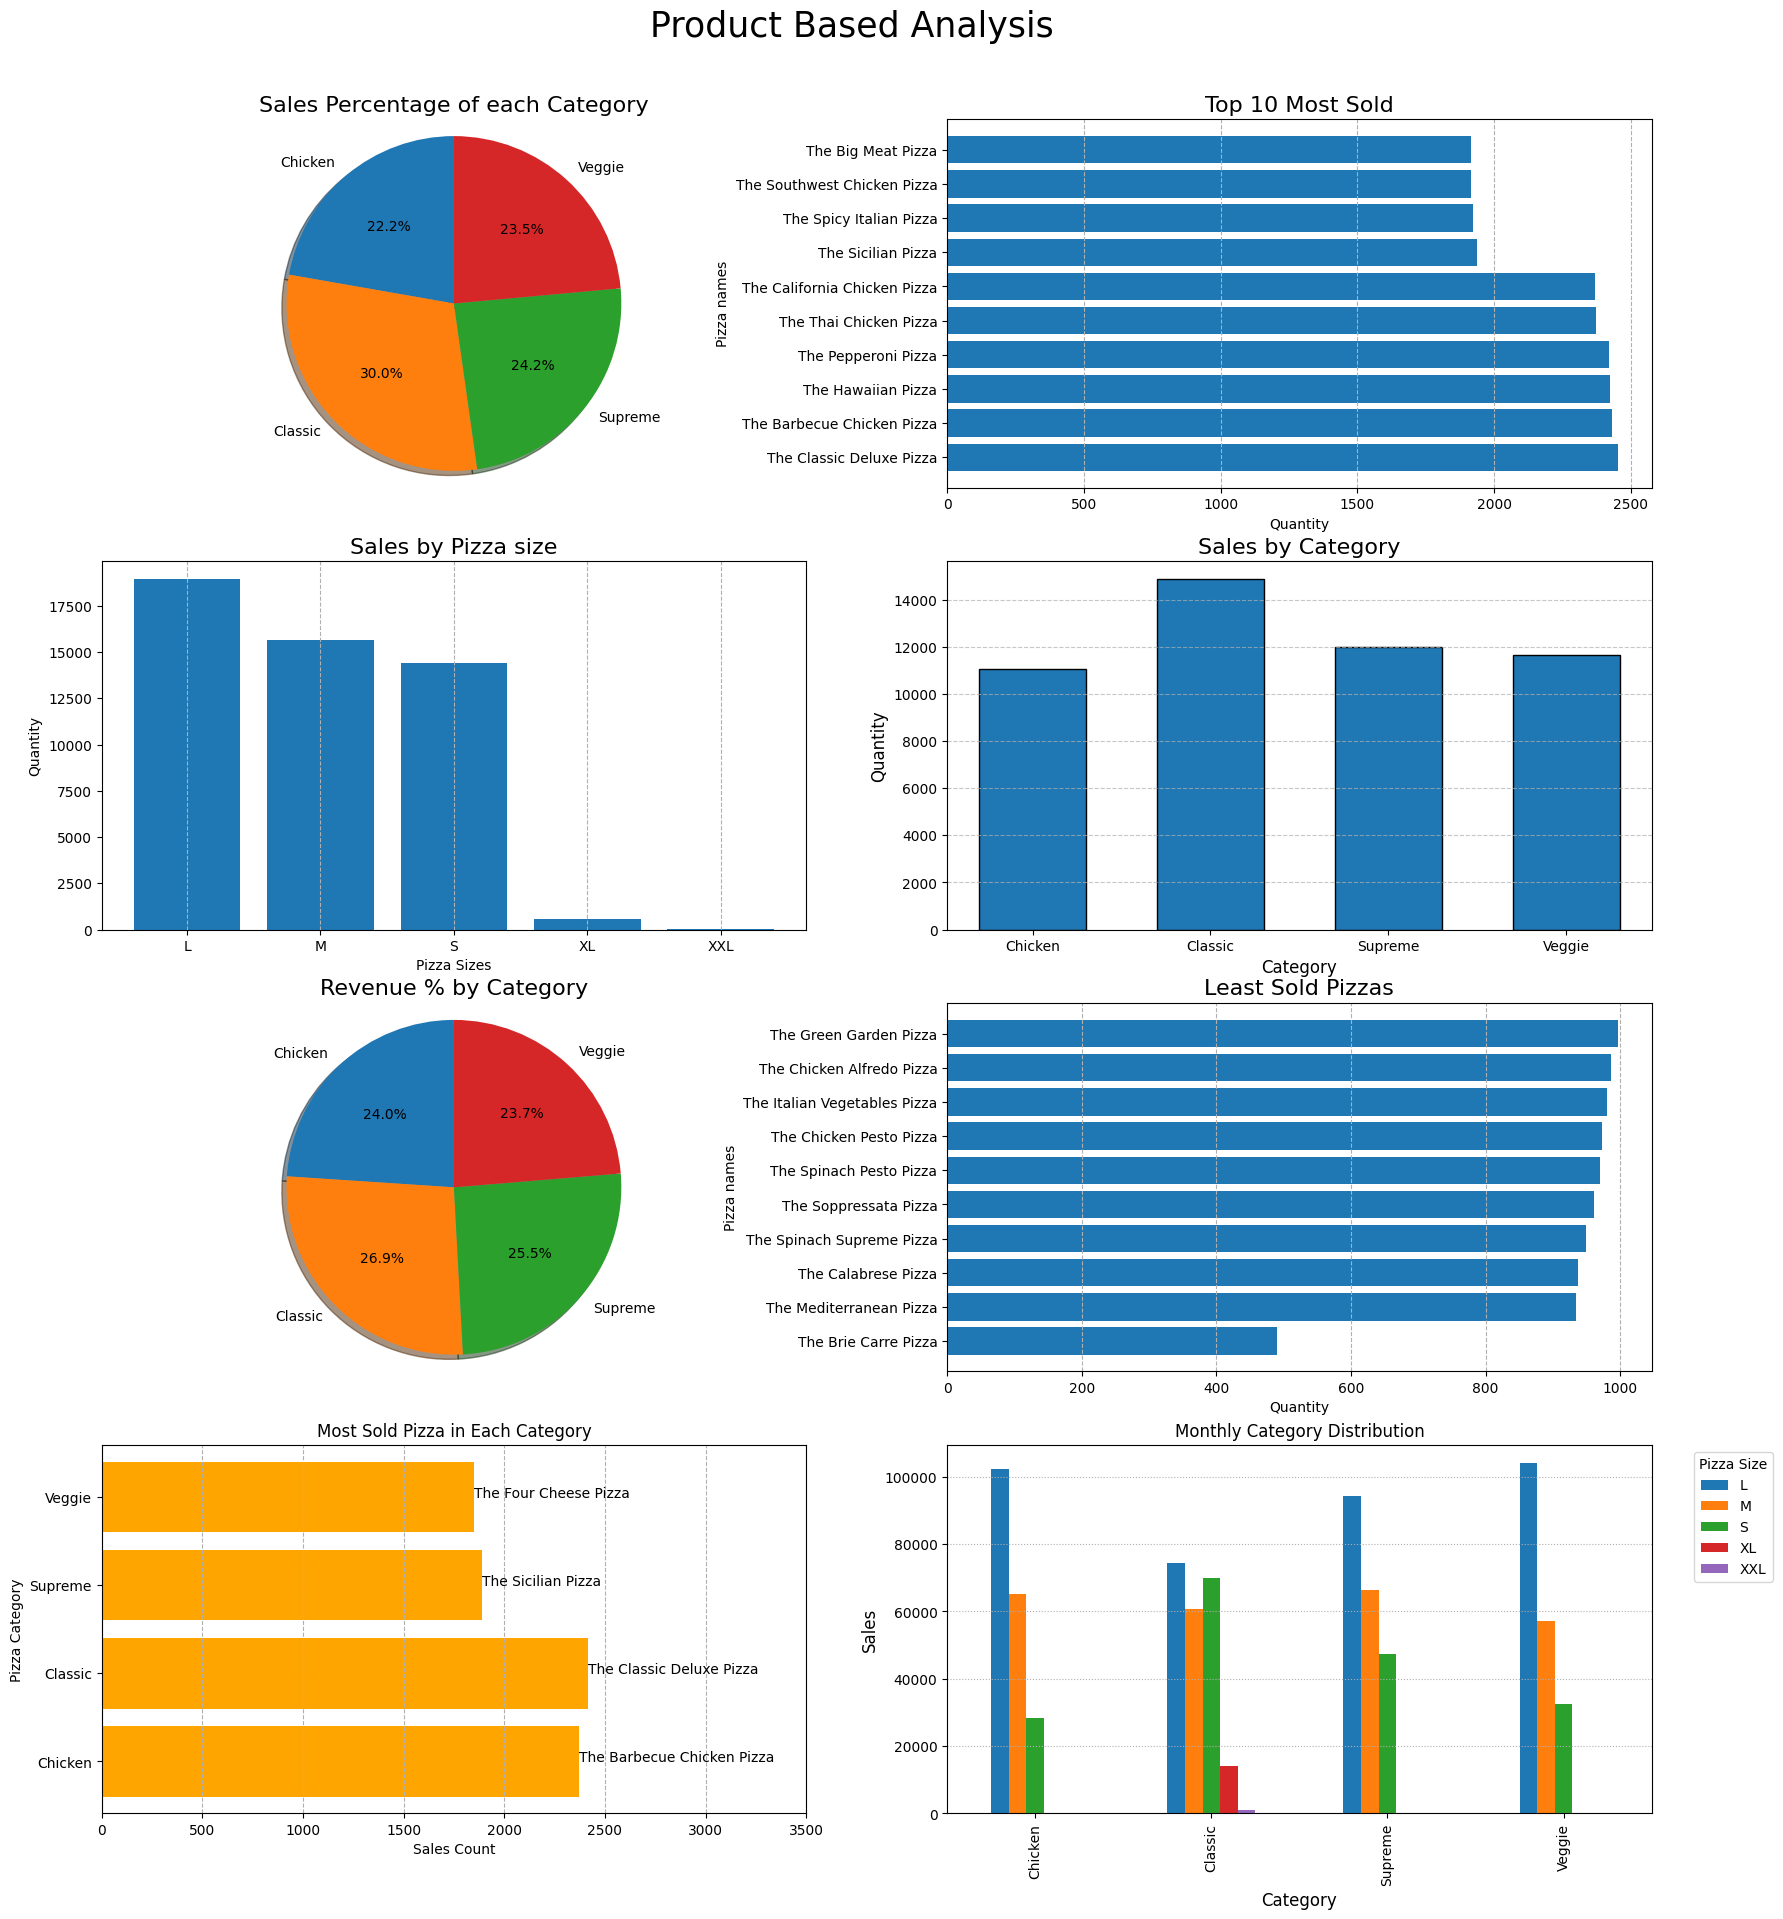

In [116]:
plt.figure(figsize=(20,22))
plt.suptitle("Product Based Analysis", fontsize=25, y=0.93)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



plt.subplot(4,2,1)

plt.pie(pct_cat_sales.values, labels=pct_cat_sales.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sales Percentage of each Category', fontsize=16)
plt.axis('equal') 



plt.subplot(4,2,2)

plt.barh(max_pizza_sales.index, max_pizza_sales.values)
plt.title('Top 10 Most Sold', fontsize=16)
plt.ylabel('Pizza names')
plt.xlabel('Quantity')
plt.grid(axis='x', linestyle='--')



plt.subplot(4,2,3)

plt.bar(size_pizza_sales.index, size_pizza_sales.values)
plt.title('Sales by Pizza size', fontsize=16)
plt.xlabel('Pizza Sizes')
plt.ylabel('Quantity')
plt.grid(axis='x', linestyle='--')



plt.subplot(4,2,4)

plt.bar(cat_sales.index, cat_sales.values, width=0.6, edgecolor='black')
plt.title('Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

    
plt.subplot(4,2,5)

plt.pie(cat_revenue.values, labels=cat_revenue.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Revenue % by Category', fontsize=16)
plt.axis('equal') 



plt.subplot(4,2,6)

plt.barh(least_pizza_sales.index, least_pizza_sales.values)
plt.title('Least Sold Pizzas', fontsize=16)
plt.ylabel('Pizza names')
plt.xlabel('Quantity')
plt.grid(axis='x', linestyle='--')



plt.subplot(4,2,7)

plt.barh(most_sold['pizza_category'], most_sold['sales_count'], color='orange')
plt.ylabel('Pizza Category')
plt.xlabel('Sales Count')
plt.xlim(0,3500)
plt.title('Most Sold Pizza in Each Category')
for x,y,z in zip(most_sold['pizza_category'],most_sold['sales_count'],most_sold['pizza_name']):
    plt.annotate(z,xy=(y,x),xytext=(y,x))
plt.grid(axis='x', linestyle='--')



plt.subplot(4,2,8)

ax3 = plt.gca()
size_cat_price.plot(kind='bar', title='Monthly Category Distribution', ax=ax3)
ax3.set_xlabel("Category", fontsize=12)
ax3.set_ylabel("Sales", fontsize=12)
ax3.grid(axis='y', linestyle=':')
ax3.legend(title='Pizza Size', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()